In [1]:
#import neccesary library
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.simplefilter("ignore",UserWarning)

### Read the csv file using pandas

In [2]:
takehome_user_engagement=pd.read_csv("takehome_user_engagement.csv")
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
#rename the column name so that we can join the two csv file with the common column
takehome_user_engagement.rename(columns={"time_stamp":"creation_time"},inplace=True)

In [4]:
takehome_users=pd.read_csv("takehome_users.csv", encoding='latin1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


### Merging data

In [5]:
take_user=pd.merge(takehome_user_engagement,takehome_users,on="creation_time")
take_user.head(2)

,creation_time,user_id,visited,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


# Description of data feature

● name:  the  user's  name
● object_id:   the  user's  id
● email:  email  address
● creation_source:   how  their  account  was  created.  This  takes  on  one
of  5  values:
○ PERSONAL_PROJECTS:  invited  to  join  another  user's
personal  workspace
○ GUEST_INVITE:  invited  to  an  organization  as  a  guest
(limited  permissions)
○ ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
○ SIGNUP:  signed  up  via  the  website
○ SIGNUP_GOOGLE_AUTH:  signed  up  using  Google
Authentication  (using  a  Google  email  account  for  their  login
id)
● creation_time:  when  they  created  their  account
● last_session_creation_time:   unix  timestamp  of  last  login
● opted_in_to_mailing_list:  whether  they  have  opted  into  receiving
marketing  emails
● enabled_for_marketing_drip:  whether  they  are  on  the  regular
marketing  email  drip
● org_id:   the  organization  (group  of  users)  they  belong  to
● invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).


# Data Cleaning

In [6]:
#checking the shape of the data
take_user.shape

(4395, 12)

In [7]:
#checking the datatype of all feature in the take_user
take_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4395 entries, 0 to 4394
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               4395 non-null   object 
 1   user_id                     4395 non-null   int64  
 2   visited                     4395 non-null   int64  
 3   object_id                   4395 non-null   int64  
 4   name                        4395 non-null   object 
 5   email                       4395 non-null   object 
 6   creation_source             4395 non-null   object 
 7   last_session_creation_time  4382 non-null   float64
 8   opted_in_to_mailing_list    4395 non-null   int64  
 9   enabled_for_marketing_drip  4395 non-null   int64  
 10  org_id                      4395 non-null   int64  
 11  invited_by_user_id          2382 non-null   float64
dtypes: float64(2), int64(6), object(4)
memory usage: 446.4+ KB


In [8]:
#checking the descriptive statistics like mean,count,25%,75%,100%,min,max for the take_user
take_user.describe()

,user_id,visited,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,4395.000000,4395.0,4395.000000,4.382000e+03,4395.000000,4395.000000,4395.000000,2382.000000
mean,6092.147895,1.0,6083.048009,1.379536e+09,0.247327,0.150853,141.452560,5955.579345
std,3440.447480,0.0,3445.485045,1.957020e+07,0.431507,0.357946,124.855814,3390.966674
min,1.000000,1.0,1.000000,1.338452e+09,0.000000,0.000000,0.000000,7.000000
25%,3135.500000,1.0,3117.500000,1.363330e+09,0.000000,0.000000,28.000000,3064.250000
50%,6119.000000,1.0,6097.000000,1.383533e+09,0.000000,0.000000,107.000000,5897.000000
75%,9071.000000,1.0,9073.000000,1.398670e+09,0.000000,0.000000,238.000000,8847.500000
max,12000.000000,1.0,12000.000000,1.401926e+09,1.000000,1.000000,416.000000,11999.000000


In [9]:
#Now changing the creation time to date timestamp for taking the year,month seperately using pandas datetime function
take_user["creation_time"]=pd.to_datetime(take_user["creation_time"])

In [10]:
#Checking the null value(data is missing or not)
take_user.isna().sum()

creation_time                    0
user_id                          0
visited                          0
object_id                        0
name                             0
email                            0
creation_source                  0
last_session_creation_time      13
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            2013
dtype: int64

#### Fill the nan values of last_session_creation_time with the Average of it 

In [11]:
average=take_user["last_session_creation_time"].mean()
take_user["last_session_creation_time"]=take_user["last_session_creation_time"].fillna(average)

#### Fill the nan values of invited_by_user_id with 0 so that no person has invited them

In [12]:
take_user["invited_by_user_id"]=take_user["invited_by_user_id"].fillna(0)

In [13]:
#Now check the nan Value
take_user.isna().sum()

creation_time                 0
user_id                       0
visited                       0
object_id                     0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [14]:
#Changing the datatype so that e+09 will convert to 1000000000 for better understand although it is not imporant..
take_user["last_session_creation_time"]=take_user["last_session_creation_time"].astype("int")

In [15]:
#seeing the first five records
take_user.head()

,creation_time,user_id,visited,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,2013-03-19 23:14:52,3,1,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,2013-01-16 22:08:03,10,1,10,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1401833283,1,1,318,4143.0
4,2014-03-30 16:19:38,13,1,13,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1396196378,0,0,254,11204.0


In [16]:
#using the datetime getting the month and year
take_user["year"]=take_user["creation_time"].dt.year# extract the year from creation_time
take_user["month"]=take_user["creation_time"].dt.month# extract the month from creation_time

In [17]:
#drop the feature that are not import for the analysis and also remove the duplicate column
take_user.drop(["creation_time","last_session_creation_time","object_id"],axis=1,inplace=True)
take_user.head()

,user_id,visited,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014,4
1,2,1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,11
2,3,1,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013,3
3,10,1,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1,1,318,4143.0,2013,1
4,13,1,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,0,0,254,11204.0,2014,3


In [18]:
#checking the unique or different values for visited feature
take_user["visited"].unique()

array([1], dtype=int64)

In [19]:
#Since there is no variance we can drop visited feature 
take_user.drop("visited",axis=1,inplace=True)
take_user.head()

,user_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014,4
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2013,11
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013,3
3,10,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1,1,318,4143.0,2013,1
4,13,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,0,0,254,11204.0,2014,3


In [20]:
#Changing the Datatype as int is preferably for better understanding
take_user["invited_by_user_id"]=take_user["invited_by_user_id"].astype("int")
take_user.head()

,user_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803,2014,4
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316,2013,11
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525,2013,3
3,10,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1,1,318,4143,2013,1
4,13,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,0,0,254,11204,2014,3


## With this the data cleaning process is done the data preprocessing or data analysis

# Data Analysis

In [21]:
#Taking the creation_source feature and finding the value counts on it
creation_source=take_user["creation_source"].value_counts()
creation_source

ORG_INVITE            1569
SIGNUP                 920
GUEST_INVITE           813
SIGNUP_GOOGLE_AUTH     695
PERSONAL_PROJECTS      398
Name: creation_source, dtype: int64

## Ploting the result using matplotlib and seaborn

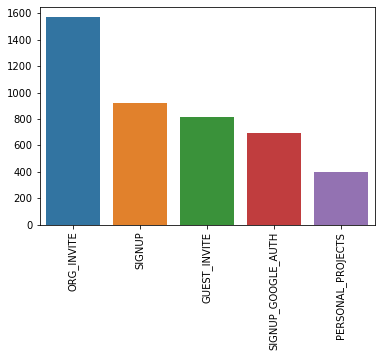

In [22]:
#plt.pie(creation_source,labels=["GUEST_INVITE","ORG_INVITE","PERSONAL_PROJECTS","SIGNUP","SIGNUP_GOOGLE_AUTH"])
labels=["GUEST_INVITE","ORG_INVITE","PERSONAL_PROJECTS","SIGNUP","SIGNUP_GOOGLE_AUTH"]
sns.barplot(x=creation_source.index,y=creation_source.values)#barplot
plt.xticks(x=creation_source.index,rotation ='vertical')#axis scale
plt.show()

# From the above barplot the org_invite has the highest number followed by signup,guest_invite,signup_google_auth,personal_project so the creation source of org_invite is successfully

In [23]:
mailing_list=take_user["opted_in_to_mailing_list"].value_counts()
mailing_list.index

Int64Index([0, 1], dtype='int64')

<AxesSubplot:>

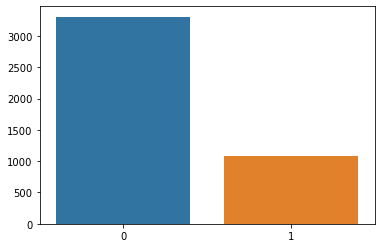

In [24]:
sns.barplot(x=mailing_list.index,y=mailing_list.values)

# From the above barplot it clearly shows that the people are not in mail conversation where some people are their to buy.

In [25]:
marketing_drip=take_user["enabled_for_marketing_drip"].value_counts()
marketing_drip

0    3732
1     663
Name: enabled_for_marketing_drip, dtype: int64

<AxesSubplot:>

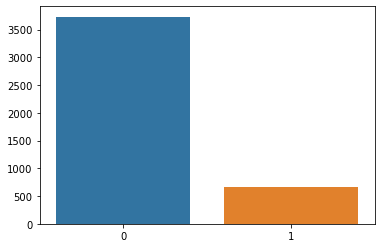

In [26]:
sns.barplot(x=marketing_drip.index,y=marketing_drip.values)

# From the above barplot the company is not in the marketing drip good to see this

In [27]:
month=take_user["month"].value_counts()
month

5     536
3     436
4     431
1     386
2     356
10    346
11    342
9     325
12    322
8     313
6     307
7     295
Name: month, dtype: int64

<AxesSubplot:>

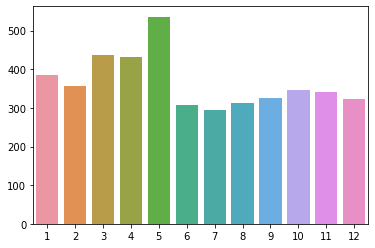

In [28]:
sns.barplot(x=month.index,y=month.values)

# From the above barplot the each month of last three years is given and every April has the sales high and weak sales is on july

In [29]:
year=take_user.year.value_counts()
year

2013    2069
2014    1327
2012     999
Name: year, dtype: int64

<AxesSubplot:>

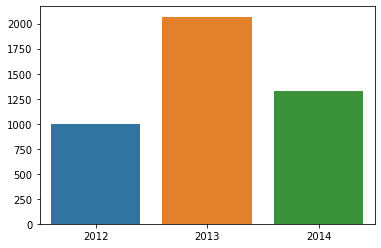

In [30]:
sns.barplot(x=year.index,y=year.values)

# From the above barplot the year of 2013 the people are visited more and a drop of 700 is happen due to some reason maybe people get bored

In [31]:
#drop the Name and email feature before the model building
take_user.drop(["name","email"],axis=1,inplace=True)
take_user.head()

,user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,GUEST_INVITE,1,0,11,10803,2014,4
1,2,ORG_INVITE,0,0,1,316,2013,11
2,3,ORG_INVITE,0,0,94,1525,2013,3
3,10,ORG_INVITE,1,1,318,4143,2013,1
4,13,ORG_INVITE,0,0,254,11204,2014,3


# All the above are from my analysis and now its time build the model of it and its a classification problem

# Model buliding

In [32]:
take_user.drop(["user_id","invited_by_user_id"],axis=1,inplace=True)#drop the unwanted feature on take_user

In [33]:
#encoding technique is one hot encoding
take_user=pd.get_dummies(take_user,drop_first=True)
take_user.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,year,month,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,2014,4,0,0,0,0
1,0,0,1,2013,11,1,0,0,0
2,0,0,94,2013,3,1,0,0,0
3,1,1,318,2013,1,1,0,0,0
4,0,0,254,2014,3,1,0,0,0


In [34]:
#seperate the independent and dependent variable
x=take_user.drop("enabled_for_marketing_drip",axis=1)#independent variable
y=take_user[["enabled_for_marketing_drip"]]#dependent or target variable

In [35]:
#checking the shape of it
x.shape , y.shape

((4395, 8), (4395, 1))

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)#train test split for fit and test different data

# Decision tree classifier

In [37]:
model=DecisionTreeClassifier()#model decisiontreeclassifier
model.fit(x_train,y_train)#fit the training data

DecisionTreeClassifier()

In [38]:
#testing the score of the model using test data
model.score(x_test,y_test)

0.7930250189537529

In [39]:
#using cross validation it take different sample and perform the model
cross_val_score(model,x,y,cv=5).mean()

0.7943117178612059

In [40]:
#confusion matrix
y_pred=model.predict(x_test)

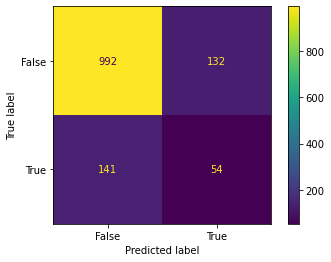

In [41]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Random forest classifier

In [42]:
model1=RandomForestClassifier()#randomforestclassifier
model1.fit(x_train,y_train)#fit the training data

RandomForestClassifier()

In [43]:
#testing the score of the model using test data
model1.score(x_test,y_test)

0.821076573161486

In [44]:
#using cross validation it take different sample and perform the model
cross_val_score(model1,x,y,cv=5).mean()

0.82320819112628

In [45]:
#confusion matrix
y_pre=model1.predict(x_test)

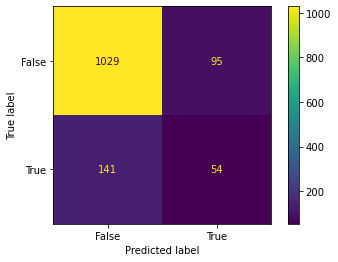

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Logistic regression

In [47]:
model2=LogisticRegression()#logistics regression model
model2.fit(x_train,y_train)#fit the training data

LogisticRegression()

In [48]:
#testing the score of the model using test data
model2.score(x_test,y_test)

0.8521607278241091

In [49]:
#using cross validation it take different sample and perform the model
cross_val_score(model2,x,y,cv=5).mean()

0.8489192263936293

# For classification problem especially binary(0,1) classification problem the logistics regression perform well and hence it is proved

In [50]:
#confusion matrix
predicted=model2.predict(x_test)

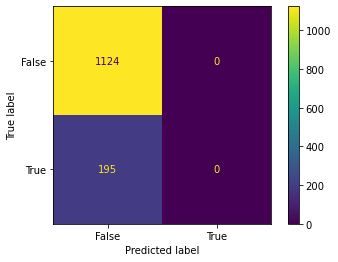

In [51]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Kmeans 

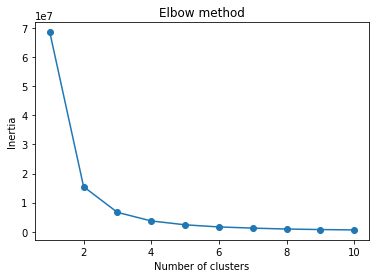

In [52]:
inertias=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(take_user)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(take_user)

KMeans(n_clusters=2)

# Conclusion

# The model of Logistic Regression gives us the best score of 85% overall and cross_validation is also used in it 